In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [2]:
# Define parameters
target_size = (128, 128)
batch_size = 16

In [3]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [8]:
# Create generators
train_generator = train_datagen.flow_from_directory(
    '102data/train',  # Update the path as needed
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '102data/val',  # Update the path as needed
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)



Found 2644 images belonging to 2 classes.
Found 187 images belonging to 2 classes.


In [9]:
# Get the class names
class_names = list(train_generator.class_indices.keys())
print(class_names)


['mri', 'non_mri']


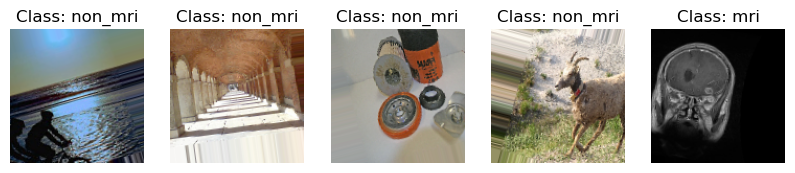

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
images, labels = next(train_generator)

# Define how many images you want to display
num_images_to_display = 5

# Set up the figure for plotting
plt.figure(figsize=(10, 10))

# Get class names from the generator
class_names = train_generator.class_indices
class_names = {v: k for k, v in class_names.items()}  # Reverse the dictionary to map labels to class names

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i])
    # Convert the label to the corresponding class name
    class_name = class_names[int(labels[i])]
    plt.title(f"Class: {class_name}")
    plt.axis('off')  # Hide the axis

plt.show()



In [14]:
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, 3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(),
    Conv2D(128, 3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [15]:
# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [17]:
# Train
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
166/166 [==============================] - 30s 131ms/step - loss: 0.8389 - accuracy: 0.9160 - val_loss: 0.5250 - val_accuracy: 0.8770
Epoch 2/20
166/166 [==============================] - 20s 118ms/step - loss: 0.3114 - accuracy: 0.9667 - val_loss: 0.2612 - val_accuracy: 0.9840
Epoch 3/20
166/166 [==============================] - 20s 119ms/step - loss: 0.2402 - accuracy: 0.9728 - val_loss: 0.4583 - val_accuracy: 0.8610
Epoch 4/20
166/166 [==============================] - 20s 118ms/step - loss: 0.2099 - accuracy: 0.9724 - val_loss: 0.1945 - val_accuracy: 0.9893
Epoch 5/20
166/166 [==============================] - 20s 120ms/step - loss: 0.2153 - accuracy: 0.9705 - val_loss: 0.2418 - val_accuracy: 0.9412
Epoch 6/20
166/166 [==============================] - 20s 120ms/step - loss: 0.1805 - accuracy: 0.9781 - val_loss: 0.3140 - val_accuracy: 0.9305
Epoch 7/20
166/166 [==============================] - 19s 117ms/step - loss: 0.1960 - accuracy: 0.9705 - val_loss: 0.3081 - val_ac

1/1 [==============================] - 0s 25ms/step


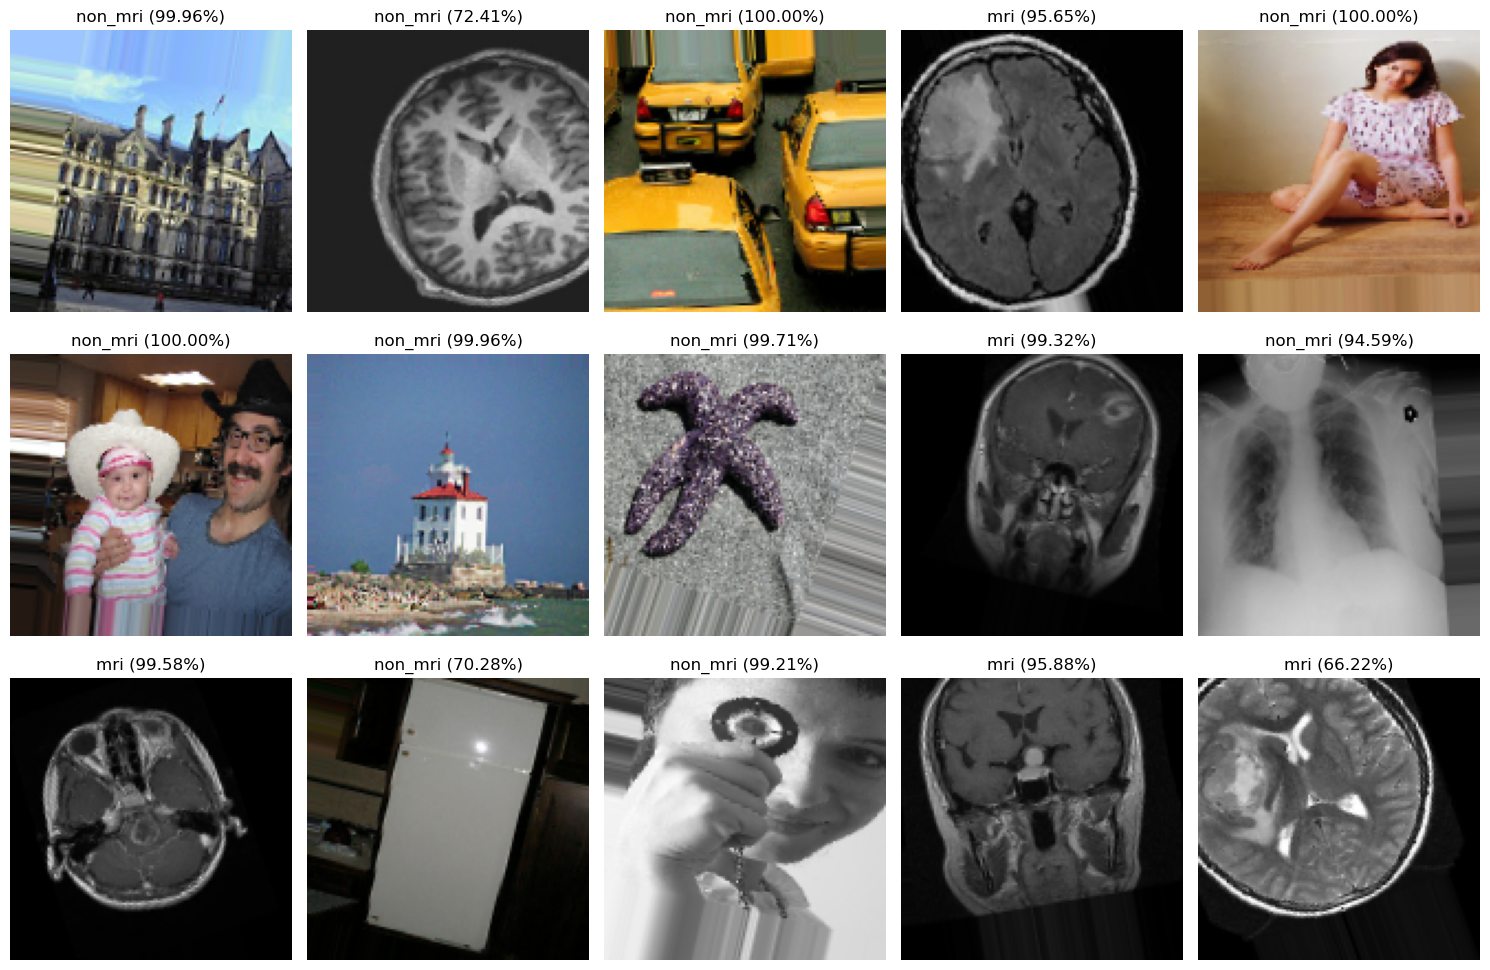

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
images, labels = next(train_generator)

# Define how many images you want to display
num_images_to_display = 15

# Set up the figure for plotting with 3 rows and 5 columns (adjusted for 15 images)
plt.figure(figsize=(15, 10))

# Get class names from the generator
class_names = train_generator.class_indices
class_names = {v: k for k, v in class_names.items()}  # Reverse the dictionary to map labels to class names

# Predict on the batch
predictions = model.predict(images)

for i in range(num_images_to_display):
    plt.subplot(3, 5, i + 1)  # 3 rows and 5 columns
    plt.imshow(images[i])
    
    # Convert the label to the corresponding class name
    predicted_class = np.round(predictions[i][0])  # Round the prediction to binary (0 or 1)
    class_name = class_names[int(predicted_class)]
    
    # Get the confidence score
    confidence = predictions[i][0] if predicted_class == 1 else 1 - predictions[i][0]
    
    # Display class name with confidence
    plt.title(f"{class_name} ({confidence*100:.2f}%)")
    plt.axis('off')  # Hide the axis

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [23]:
model.save(f"../102mod")

INFO:tensorflow:Assets written to: ../102mod\assets


INFO:tensorflow:Assets written to: ../102mod\assets
